

```
Name: Sudarsun S
RegNo: 20BCE1699
Machine Learning Embedded Lab
Topic: CART Classifier (Decision Tree using Gini Index Algorithm)
```



## Importing necessary libraries

In [40]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score

## Load the Iris dataset

In [41]:
iris = load_iris()
X = iris.data
y = iris.target

## DecisionTreeClassifier using CART Algorithm (Gini Index)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini')

clf.fit(X_train, y_train)
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |   |--- class: 2

## Visualizing Decision Tree

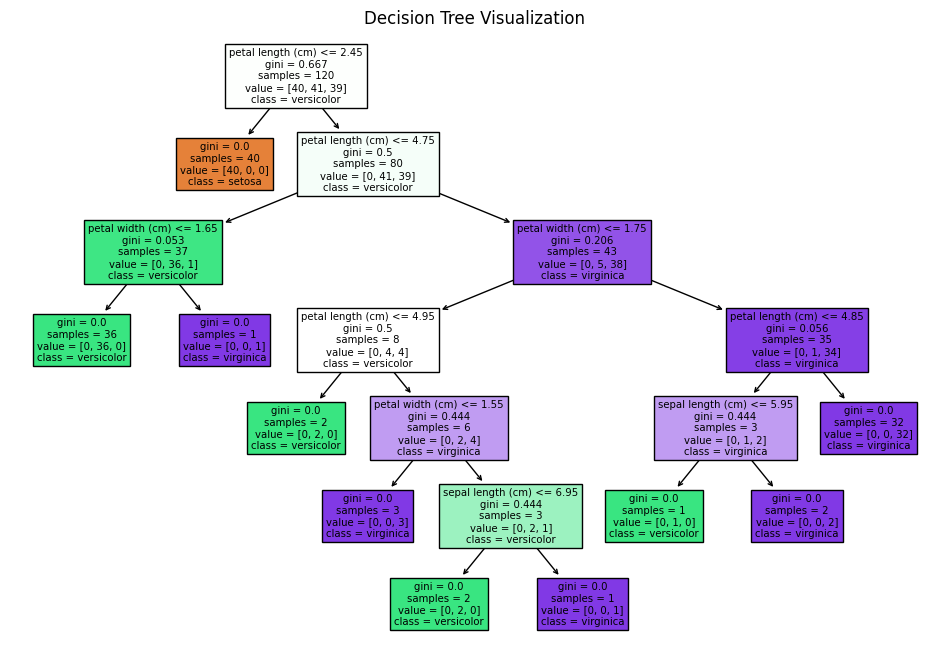

In [43]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## Evaluation Metrics Calculation

In [44]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("\nEvaluation Metrics on Test Set:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)



Evaluation Metrics on Test Set:
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


## K-Fold cross-validation on the training set and scoring metrics

In [45]:
scoring = {
    'accuracy': 'accuracy',
    'f1_score': make_scorer(f1_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted')
}

cv_results = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring)

print("\nK-Fold Cross-Validation Results on Training Set:")
print("Accuracy:", np.mean(cv_results['test_accuracy']))
print("F1 Score:", np.mean(cv_results['test_f1_score']))
print("Precision:", np.mean(cv_results['test_precision']))
print("Recall:", np.mean(cv_results['test_recall']))


K-Fold Cross-Validation Results on Training Set:
Accuracy: 0.9416666666666668
F1 Score: 0.9409709920855432
Precision: 0.946574074074074
Recall: 0.9416666666666668


## Hyperparameter Optimisation using Grid Search, Trained Again and Accuracy Calculated

In [46]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("\nBest Hyperparameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)
test_accuracy = best_clf.score(X_test, y_test)
print("\nTest Set Accuracy:", test_accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Test Set Accuracy: 1.0


## Visualizing the Decision Tree

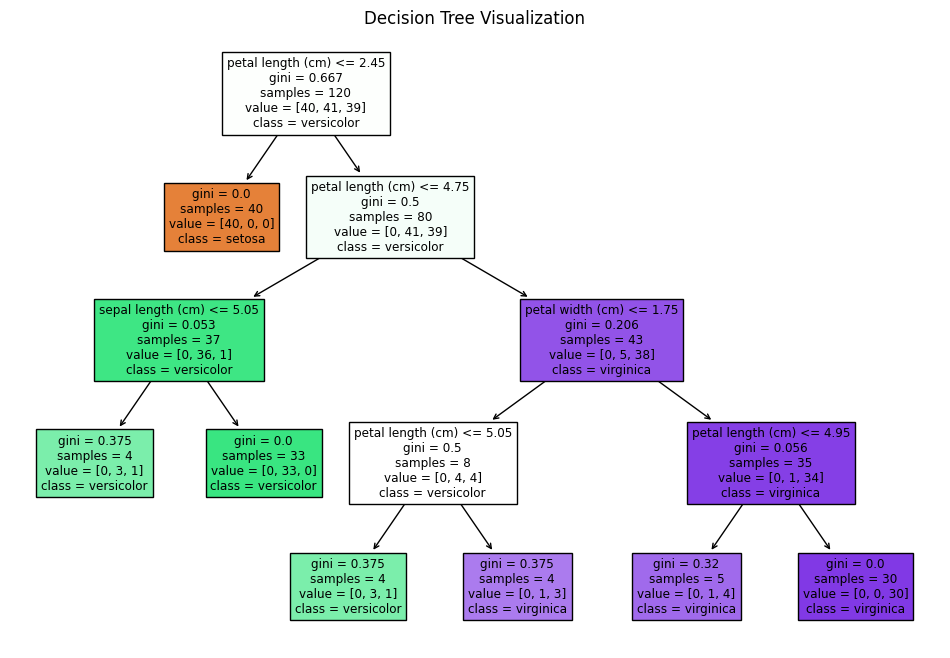

In [47]:
plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()